Najine hipoteze so:

1. Kromatični indeks v večini primerov pade na 3.
2. Kromatični indeks se ohrani v primeru,da je povezava del najkrajšega cikla. Dolžina cikla <= 4
3. Kromatični indeks se nikoli ne vrne nazaj na 4, ko je enkrat že 3.



Najprej naložima snarke:


In [7]:
G = graphs.PetersenGraph()
blanusa_snark_1 = Graph({
    0: [1, 5, 6], 1: [0, 2, 7], 2: [1, 3, 8], 3: [2, 4, 9],
    4: [3, 5, 10], 5: [0, 4, 11], 6: [0, 8, 10], 7: [1, 9, 11],
    8: [2, 6, 11], 9: [3, 7, 10], 10: [4, 6, 9], 11: [5, 7, 8]
})
blanusa_snark_2 = Graph({
    0: [1, 4, 5], 1: [0, 2, 6], 2: [1, 3, 7], 3: [2, 4, 8],
    4: [0, 3, 9], 5: [0, 7, 8], 6: [1, 8, 9], 7: [2, 5, 9],
    8: [3, 5, 6], 9: [4, 6, 7]
})
tietze_snark = Graph({
    0: [1, 2, 3], 1: [0, 4, 5], 2: [0, 6, 7], 3: [0, 8, 9],
    4: [1, 6, 10], 5: [1, 7, 11], 6: [2, 4, 12], 7: [2, 5, 13],
    8: [3, 10, 12], 9: [3, 11, 13], 10: [4, 8, 14], 11: [5, 9, 15],
    12: [6, 8, 14], 13: [7, 9, 15], 14: [10, 12, 15], 15: [11, 13, 14]
})
celmins_swart_snark_1 = Graph({0: [1, 2, 3], 1: [0, 23, 25], 2: [0, 21, 24], 3: [0, 20, 22],4: [8, 12, 14], 5: [6, 8, 13], 6: [5, 9, 14], 7: [10, 11, 15],8: [4, 5, 18], 9: [6, 10, 18], 10: [7, 9, 17], 11: [7, 19, 22],12: [4, 13, 25], 13: [5, 12, 21], 14: [4, 6, 21], 15: [7, 16, 20],16: [15, 17, 22], 17: [10, 16, 23], 18: [8, 9, 23], 19: [11, 20, 24],20: [3, 15, 19], 21: [2, 13, 14], 22: [3, 11, 16], 23: [1, 17, 18],24: [2, 19, 25], 25: [1, 12, 24]})
celmins_swart_snark_2 = Graph({0: [1, 2, 3], 1: [0, 21, 25], 2: [0, 22, 23], 3: [0, 20, 24],4: [5, 6, 9], 5: [4, 13, 16], 6: [4, 12, 17], 7: [8, 11, 17],8: [7, 12, 19], 9: [4, 10, 14], 10: [9, 11, 16], 11: [7, 10, 18], 12: [6, 8, 15], 13: [5, 14, 15], 14: [9, 13, 23], 15: [12, 13, 20],16: [5, 10, 21], 17: [6, 7, 20], 18: [11, 19, 21], 19: [8, 18, 22],20: [3, 15, 17], 21: [1, 16, 18], 22: [2, 19, 25], 23: [2, 14, 24],24: [3, 23, 25], 25: [1, 22, 24]})
double_star_snark = Graph({0: [1, 2, 3], 1: [0, 24, 27], 2: [0, 26, 29], 3: [0, 25, 28],4: [7, 8, 15], 5: [6, 11, 14], 6: [5, 10, 15], 7: [4, 9, 14],8: [4, 12, 16], 9: [7, 13, 17], 10: [6, 12, 17], 11: [5, 13, 16],12: [8, 10, 20], 13: [9, 11, 21], 14: [5, 7, 26], 15: [4, 6, 25],16: [8, 11, 27], 17: [9, 10, 27], 18: [21, 23, 29], 19: [20, 22, 28],20: [12, 19, 29], 21: [13, 18, 28], 22: [19, 24, 26], 23: [18, 24, 25],24: [1, 22, 23], 25: [3, 15, 23], 26: [2, 14, 22], 27: [1, 16, 17],28: [3, 19, 21], 29: [2, 18, 20]})
flower_snark_j5 = Graph({0: [1, 2, 3], 1: [0, 14, 15], 2: [0, 17, 19], 3: [0, 16, 18],4: [7, 8, 9], 5: [6, 10, 11], 6: [5, 9, 14], 7: [4, 10, 15],8: [4, 11, 16], 9: [4, 6, 17], 10: [5, 7, 19], 11: [5, 8, 18],12: [14, 18, 19], 13: [15, 16, 17], 14: [1, 6, 12], 15: [1, 7, 13],16: [3, 8, 13], 17: [2, 9, 13], 18: [3, 11, 12], 19: [2, 10, 12]})
flower_snark_j7 = Graph({0: [1, 2, 3], 1: [0, 22, 23], 2: [0, 25, 27], 3: [0, 24, 26],4: [7, 8, 12], 5: [6, 9, 12], 6: [5, 11, 13], 7: [4, 10, 13],8: [4, 14, 18], 9: [5, 14, 21], 10: [7, 15, 20], 11: [6, 15, 19],12: [4, 5, 17], 13: [6, 7, 16], 14: [8, 9, 26], 15: [10, 11, 27],16: [13, 17, 27], 17: [12, 16, 26], 18: [8, 22, 24], 19: [11, 22, 25],20: [10, 23, 25], 21: [9, 23, 24], 22: [1, 18, 19], 23: [1, 20, 21],24: [3, 18, 21], 25: [2, 19, 20], 26: [3, 14, 17], 27: [2, 15, 16]})
goldberg_snark_3 = Graph({0: [1, 2, 3], 1: [0, 18, 20], 2: [0, 19, 21], 3: [0, 22, 23], 4: [5, 8, 13],5: [4, 9, 14], 6: [7, 10, 15], 7: [6, 11, 12], 8: [4, 12, 16],9: [5, 15, 17], 10: [6, 14, 17], 11: [7, 13, 16], 12: [7, 8, 21],13: [4, 11, 18], 14: [5, 10, 19], 15: [6, 9, 20], 16: [8, 11, 23],19: [9, 10, 22], 18: [1, 13, 19], 19: [2, 14, 18], 20: [1, 15, 21],21: [2, 12, 20], 22: [3, 17, 23], 23: [3, 16, 22]})
loupekines_snark_1 = Graph({0: [1, 2, 3], 1: [0, 16, 21], 2: [0, 18, 20], 3: [0, 17, 19],4: [10, 12, 14], 5: [11, 13, 15], 6: [9, 12, 15], 7: [8, 13, 14],8: [7, 10, 16], 9: [6, 11, 16], 10: [4, 8, 17], 11: [5, 9, 18],12: [4, 6, 18], 13: [5, 7, 17], 14: [4, 7, 20], 15: [5, 6, 19],16: [1, 8, 9], 17: [3, 10, 13], 18: [2, 11, 12], 19: [3, 15, 21],20: [2, 14, 21], 21: [1, 19, 20]})
loupekines_snark_2 = Graph({0: [1, 2, 3], 1: [0, 16, 21], 2: [0, 18, 20], 3: [0, 17, 19],4: [8, 10, 14], 5: [9, 11, 15], 6: [7, 12, 15], 7: [6, 13, 14],8: [4, 13, 16], 9: [5, 12, 16], 10: [4, 11, 17], 11: [5, 10, 18],12: [6, 9, 18], 13: [7, 8, 17], 14: [4, 7, 20], 15: [5, 6, 19],16: [1, 8, 9], 17: [3, 10, 13], 18: [2, 11, 12], 19: [3, 15, 21],20: [2, 14, 21], 21: [1, 19, 20]})
snark_2760 = Graph({0: [1, 2, 3], 1: [0, 15, 17], 2: [0, 14, 16], 3: [0, 12, 13], 4: [5, 9, 11],5: [4, 7, 8], 6: [7, 9, 12], 7: [5, 6, 13], 8: [5, 10, 12], 9: [4, 6, 16],10: [8, 13, 17], 11: [4, 14, 15], 12: [3, 6, 8], 13: [3, 7, 10], 14: [2, 11, 17],15: [1, 11, 16], 16: [2, 9, 15], 17: [1, 10, 14]})
snark_3337 = Graph({0: [1, 2, 3], 1: [0, 29, 32], 2: [0, 28, 33], 3: [0, 30, 31], 4: [12, 14, 18],5: [13, 15, 19], 6: [11, 14, 16], 7: [10, 15, 17], 8: [9, 26, 27], 9: [8, 16, 17],10: [7, 13, 20], 11: [6, 12, 21], 12: [4, 11, 23], 13: [5, 10, 22],14: [4, 6, 24], 15: [5, 7, 25], 16: [6, 9, 23], 17: [7, 9, 22], 18: [4, 21, 25],19: [5, 20, 24], 20: [10, 19, 31], 21: [11, 18, 30], 22: [13, 17, 31],23: [12, 16, 30], 24: [14, 19, 29], 25: [15, 18, 28], 26: [8, 29, 33], 27: [8, 28, 32], 28: [2, 25, 27], 29: [1, 24, 26], 30: [3, 21, 23], 31: [3, 20, 22], 32: [1, 27, 33], 33: [2, 26, 32]})
snark_3363 = Graph({0: [1, 2, 3], 1: [0, 30, 35], 2: [0, 32, 34], 3: [0, 31, 33], 4: [11, 25, 29],5: [9, 10, 27], 6: [8, 12, 29], 7: [15, 24, 28], 8: [6, 17, 26], 9: [5, 11, 16],10: [5, 13, 28], 11: [4, 9, 14], 12: [6, 19, 24], 13: [10, 18, 25], 14: [11, 15, 20],15: [7, 14, 21], 16: [9, 17, 21], 17: [8, 16, 20], 18: [13, 23, 27], 19: [12, 23, 26], 20: [14, 17, 22], 21: [15, 16, 22], 22: [20, 21, 30],23: [18, 19, 30], 24: [7, 12, 32], 25: [4, 13, 31], 26: [8, 19, 32], 27: [5, 18, 31], 28: [7, 10, 34], 29: [4, 6, 33], 30: [1, 22, 23], 31: [3, 25, 27],32: [2, 24, 26], 33: [3, 29, 35], 34: [2, 28, 35], 35: [1, 33, 34]})
graf_25159 = Graph({0: [1, 2, 3], 1: [0, 42, 43], 2: [0, 39, 40], 3: [0, 38, 41], 4: [9, 12, 13], 5: [8, 10, 11], 6: [7, 14, 16], 7: [6, 15, 17], 8: [5, 14, 15], 9: [4, 16, 17], 10: [5, 13, 18], 11: [5, 12, 19], 12: [4, 11, 18], 13: [4, 10, 19], 14: [6, 8, 20], 15: [7, 8, 21], 16: [6, 9, 21], 17: [7, 9, 20], 18: [10, 12, 22], 19: [11, 13, 23], 20: [14, 17, 25], 21: [15, 16, 24], 22: [18, 28, 29], 23: [19, 26, 27], 24: [21, 32, 33], 25: [20, 30, 31], 26: [23, 29, 34], 27: [23, 28, 35], 28: [22, 27, 34], 29: [22, 26, 35], 30: [25, 33, 37], 31: [25, 32, 36], 32: [24, 31, 37], 33: [24, 30, 36], 34: [26, 28, 38], 35: [27, 29, 39], 36: [31, 33, 41], 37: [30, 32, 40], 38: [3, 34, 43], 39: [2, 35, 42], 40: [2, 37, 43], 41: [3, 36, 42], 42: [1, 39, 41], 43: [1, 38, 40]})


Zdaj pa še Algoritem 2:


In [4]:
import random
from random import shuffle

def algoritem_2(snark):
    snark = snark.copy()
    """
    Transformira graf z določenim pravilom: odstrani dve vozlišči, doda štiri nova in jih poveže v 4-cikel.
    
    :param snark: Graf, ki predstavlja vhodni graf.
    :return: kromatični indeks.
    """
    # Kopiramo seznam povezav za varno iteracijo
    povezave = snark.edges(labels=False)
    n = snark.order()
    
    # Izberi naključno povezavo
    a, b = random.choice(povezave)
    
    # Pridobi sosede vozlišč a in b (brez medsebojnih povezav)
    sosedi_a = [v for v in snark.neighbors(a) if v != b]
    sosedi_b = [v for v in snark.neighbors(b) if v != a]
    
    if len(sosedi_a) != 2 or len(sosedi_b) != 2:
        raise ValueError("Vozlišči a in b nimata točno dveh drugih sosedov.")
    
    a1, a2 = sosedi_a
    b1, b2 = sosedi_b
    
    # Odstranimo vozlišča a in b
    snark.delete_vertices([a, b])
    
    # Dodamo nova vozlišča
    nova_vozlisca = [n, n+1, n+2, n+3]
    snark.add_vertices(nova_vozlisca)
    
    # Povežemo nova vozlišča z ustreznimi starimi
    snark.add_edge(a1, n)
    snark.add_edge(a2, n+1)
    snark.add_edge(b1, n+2)
    snark.add_edge(b2, n+3)
    
    # Povezave v naključnem 4-ciklu
    random.shuffle(nova_vozlisca)
    snark.add_edges([(nova_vozlisca[i], nova_vozlisca[(i + 1) % 4]) for i in range(4)])
    
    # Preverimo kromatični indeks
    krom_indeks = snark.chromatic_index()
    
    return krom_indeks, (a,b)


In [35]:
algoritem_2(G)

(3, (5, 8))

In [4]:
algoritem_2(celmins_swart_snark_1)

(3, (19, 24))

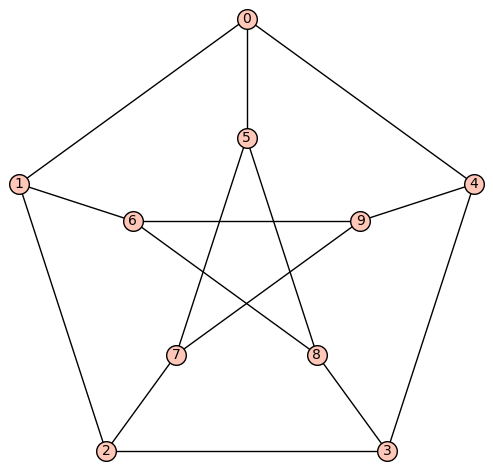

In [5]:
G.plot()

Algoritem, ki k\_krat požene kodo algoritem\_2 na osnovnem snarku. Gledamo toraj le prvo uvedbo 4 cikla.


In [5]:
import random
from random import shuffle

def ponavljaj_algoritem_2(snark, k):
    snark=snark.copy()
    """
    Izvede algoritem za transformacijo grafa z dodajanjem 4-ciklov k-krat.
    
    :param snark: Graf, ki predstavlja snark.
    :param k: Število iteracij algoritma.
    :return: Tuple (seznam kromatičnih indeksov, seznam odstranjenih oglišč).
    """
    # Seznam za shranjevanje rezultatov
    kromaticni_indeksi = []
    odstranjena_vozlisca = []
    
    # Za vsako iteracijo
    for _ in range(k):
        # Klic funkcije algoritem_2
        krom_indeks, odstranjenje = algoritem_2(snark)
        
        # Shranimo rezultat
        kromaticni_indeksi.append(krom_indeks)
        odstranjena_vozlisca.append(odstranjenje)
    
    # Vrni seznam vseh kromatičnih indeksov in seznam odstranjenih vozlišč
    return [(kromaticni_indeksi[i], odstranjena_vozlisca[i]) for i in range(k)]

# Zagon funkcije z vašim grafom snark in številom k iteracij
# Primer: iteriraj_algoritem_2(graf, 5) za 5 iteracij


In [6]:
def ponavljaj_algoritem_2_samo_4(snark, k):
    """
    Izvede algoritem za transformacijo grafa z dodajanjem 4-ciklov k-krat.
    Vrnemo le rezultate, kjer je kromatični indeks enak 4.
    
    :param snark: Graf, ki predstavlja snark.
    :param k: Število iteracij algoritma.
    :return: Seznam tuple (kromatični indeks, odstranjena vozlišča) za tiste iteracije, kjer je kromatični indeks 4.
    """
    snark = snark.copy()
    rezultati = []
    
    # Izvedi algoritem k-krat
    for _ in range(k):
        try:
            # Klic funkcije algoritem_2
            krom_indeks, odstranjena_povezava = algoritem_2(snark)
            
            # Shrani samo tiste, kjer je kromatični indeks enak 4
            if krom_indeks == 4:
                rezultati.append((krom_indeks, odstranjena_povezava))
        except Exception as e:
            # Če se pojavi napaka (npr. neveljavna konfiguracija grafa), jo ignoriramo
            print(f"Napaka: {e}")
    
    return list(set(rezultati))


In [7]:
ponavljaj_algoritem_2(G,200)

[(3, (0, 1)),
 (3, (3, 4)),
 (3, (2, 7)),
 (3, (3, 4)),
 (3, (3, 8)),
 (3, (7, 9)),
 (3, (5, 7)),
 (3, (6, 9)),
 (3, (3, 8)),
 (3, (4, 9)),
 (3, (2, 3)),
 (3, (0, 1)),
 (3, (0, 4)),
 (3, (3, 4)),
 (3, (0, 4)),
 (3, (5, 8)),
 (3, (0, 4)),
 (3, (4, 9)),
 (3, (0, 4)),
 (3, (0, 5)),
 (3, (3, 4)),
 (3, (3, 8)),
 (3, (3, 8)),
 (3, (2, 3)),
 (3, (3, 4)),
 (3, (3, 4)),
 (3, (1, 2)),
 (3, (4, 9)),
 (3, (0, 4)),
 (3, (4, 9)),
 (3, (6, 9)),
 (3, (1, 6)),
 (3, (2, 7)),
 (3, (0, 5)),
 (3, (0, 5)),
 (3, (6, 8)),
 (3, (0, 1)),
 (3, (7, 9)),
 (3, (7, 9)),
 (3, (6, 9)),
 (3, (1, 6)),
 (3, (5, 8)),
 (3, (7, 9)),
 (3, (5, 7)),
 (3, (1, 2)),
 (3, (0, 1)),
 (3, (3, 4)),
 (3, (0, 4)),
 (3, (1, 2)),
 (3, (1, 6)),
 (3, (5, 8)),
 (3, (5, 8)),
 (3, (1, 2)),
 (3, (5, 8)),
 (3, (4, 9)),
 (3, (3, 8)),
 (3, (6, 9)),
 (3, (4, 9)),
 (3, (2, 3)),
 (3, (1, 6)),
 (3, (2, 3)),
 (3, (2, 3)),
 (3, (6, 8)),
 (3, (3, 4)),
 (3, (6, 9)),
 (3, (5, 7)),
 (3, (5, 7)),
 (3, (1, 2)),
 (3, (3, 4)),
 (3, (0, 1)),
 (3, (4, 9)),
 (3, (

In [57]:
ponavljaj_algoritem_2_samo_4(G,100)

[]

In [11]:
ponavljaj_algoritem_2_samo_4(blanusa_snark_1,200)

[]

In [12]:
ponavljaj_algoritem_2_samo_4(blanusa_snark_2,200)

[]

In [13]:
ponavljaj_algoritem_2_samo_4(tietze_snark,200)

[]

#####



In [36]:
ponavljaj_algoritem_2_samo_4(celmins_swart_snark_2,200)

[]

In [15]:
ponavljaj_algoritem_2_samo_4(celmins_swart_snark_1,200)

[]

In [16]:
ponavljaj_algoritem_2_samo_4(double_star_snark,200)

[]

In [17]:
ponavljaj_algoritem_2_samo_4(flower_snark_j5,200)

[]

In [19]:
ponavljaj_algoritem_2_samo_4(flower_snark_j7,200)

[]

In [58]:
ponavljaj_algoritem_2_samo_4(goldberg_snark_3,200)

[(4, (3, 23)), (4, (3, 22)), (4, (22, 23))]

In [20]:
ponavljaj_algoritem_2_samo_4(loupekines_snark_1,200)

[]

In [21]:
ponavljaj_algoritem_2_samo_4(loupekines_snark_2,200)

[]

In [22]:
ponavljaj_algoritem_2_samo_4(snark_2760,200)

[]

In [23]:
ponavljaj_algoritem_2_samo_4(snark_3337,200)

[]

In [38]:
ponavljaj_algoritem_2_samo_4(snark_3363,200)

[(4, (9, 11)),
 (4, (4, 11)),
 (4, (4, 11)),
 (4, (9, 11)),
 (4, (4, 11)),
 (4, (4, 11)),
 (4, (9, 11)),
 (4, (9, 11)),
 (4, (4, 11)),
 (4, (9, 11)),
 (4, (4, 11))]

In [25]:
ponavljaj_algoritem_2_samo_4(graf_25159,200)

[(4, (27, 28)),
 (4, (29, 35)),
 (4, (1, 43)),
 (4, (3, 41)),
 (4, (22, 29)),
 (4, (10, 13)),
 (4, (6, 16)),
 (4, (23, 27)),
 (4, (30, 37)),
 (4, (24, 33)),
 (4, (41, 42)),
 (4, (17, 20)),
 (4, (25, 31)),
 (4, (5, 11)),
 (4, (24, 32)),
 (4, (8, 14)),
 (4, (4, 9)),
 (4, (20, 25)),
 (4, (33, 36)),
 (4, (11, 12)),
 (4, (1, 42)),
 (4, (34, 38)),
 (4, (11, 12)),
 (4, (0, 2)),
 (4, (41, 42)),
 (4, (22, 28)),
 (4, (5, 11)),
 (4, (26, 29)),
 (4, (22, 29)),
 (4, (23, 26)),
 (4, (9, 16)),
 (4, (21, 24)),
 (4, (5, 11)),
 (4, (16, 21)),
 (4, (9, 17)),
 (4, (38, 43)),
 (4, (10, 18)),
 (4, (4, 13)),
 (4, (9, 17)),
 (4, (4, 13)),
 (4, (36, 41)),
 (4, (36, 41)),
 (4, (31, 32)),
 (4, (8, 14)),
 (4, (26, 29)),
 (4, (29, 35)),
 (4, (22, 28)),
 (4, (0, 3)),
 (4, (12, 18)),
 (4, (21, 24)),
 (4, (3, 38)),
 (4, (30, 37)),
 (4, (5, 10)),
 (4, (9, 17)),
 (4, (1, 43)),
 (4, (14, 20)),
 (4, (0, 2)),
 (4, (6, 14)),
 (4, (4, 12)),
 (4, (5, 10)),
 (4, (41, 42)),
 (4, (23, 26)),
 (4, (6, 16)),
 (4, (5, 11)),
 (4, (2

Pri ponavljanju algoritma\_2 za prvi korak lahko vidimo, da se je kromatični indeks ohranil le pri majhnem številu snarkov. Ohrani se pri snarku "graf\_25159". Tukaj se ohrani vedno, ne glede na izbiro začetne povezave. Pri snarku "goldberg\_snark\_1" se ohrani le vprimeru, da izberemo določene povezave. Prav tako tudi v snarku "snark\_3363".


Poskusimo zdaj ročno ugotoviti, zakaj se pri goldberg\_snark\_3 indeks ohrani:

. Najprej določimo lastnosti snarka:



In [7]:
def preveri_lastnosti(snark):
    """
    Preveri ključne lastnosti grafa.
    :param snark: Graf, ki ga analiziramo.
    :return: Slovar s ključnimi lastnostmi grafa.
    """
    lastnosti = {
        "kubičen": all(deg == 3 for deg in snark.degree()),
        "brez_mostov": len(list(snark.bridges())) == 0,
        "girth": snark.girth(),
        "kromatični_indeks": snark.chromatic_index(),
        "kromatično_število": snark.chromatic_number()
    }
    return lastnosti


In [33]:
preveri_lastnosti(goldberg_snark_3)

{'kubičen': True,
 'brez_mostov': True,
 'girth': 3,
 'kromatični_indeks': 4,
 'kromatično_število': 3}

In [8]:
preveri_lastnosti(snark_3363)

{'kubičen': True,
 'brez_mostov': True,
 'girth': 5,
 'kromatični_indeks': 4,
 'kromatično_število': 3}

In [15]:
preveri_lastnosti(graf_25159)

{'kubičen': True,
 'brez_mostov': True,
 'girth': 5,
 'kromatični_indeks': 4,
 'kromatično_število': 3}

In [3]:
def analiza_vozlišča(snark, a, b):
    """
    Analizira povezave in cikle, povezane z vozliščema a in b v grafu.
    :param snark: Graf, ki ga analiziramo.
    :param a: Vozlišče a.
    :param b: Vozlišče b.
    :return: Slovar z analizo vozlišč in ciklov.
    """
    sosedi_a = list(snark.neighbors(a))  # Sosedi vozlišča a
    sosedi_b = list(snark.neighbors(b))  # Sosedi vozlišča b
    skupni_sosedi = set(sosedi_a) & set(sosedi_b)  # Skupni sosedi

    # Najdi osnovne cikle v grafu
    osnova_ciklov = snark.cycle_basis()  # Osnova ciklov
    cikli_z_a = [cikel for cikel in osnova_ciklov if a in cikel]
    cikli_z_b = [cikel for cikel in osnova_ciklov if b in cikel]

    analiza = {
        "sosedi_a": sosedi_a,
        "sosedi_b": sosedi_b,
        "skupni_sosedi": skupni_sosedi,
        "najkrajsi_cikel": min(snark.cycle_basis(), key = len),
        "najdalsi_cikel" : max(snark.cycle_basis(), key=len),
        "vsi_cikli": snark.cycle_basis(),
        "cikli_z_a": cikli_z_a,
        "cikli_z_b": cikli_z_b,
        "girth": snark.girth(),
        "skupni_cikli": set(tuple(cikel) for cikel in cikli_z_a) & set(tuple(cikel) for cikel in cikli_z_b),  # Corrected line
        "kromatični_indeks": algoritem_2_izbrana(snark, (a,b))
    }
    return analiza


In [7]:
analiza_vozlišča(G,7,9)

{'sosedi_a': [2, 5, 9],
 'sosedi_b': [4, 6, 7],
 'skupni_sosedi': set(),
 'najkrajsi_cikel': [6, 8, 5, 7, 9],
 'najdalsi_cikel': [4, 3, 8, 5, 7, 9],
 'vsi_cikli': [[6, 8, 5, 7, 9],
  [2, 3, 8, 5, 7],
  [4, 3, 8, 5, 7, 9],
  [4, 0, 5, 7, 9],
  [2, 1, 0, 5, 7],
  [6, 1, 0, 5, 7, 9]],
 'cikli_z_a': [[6, 8, 5, 7, 9],
  [2, 3, 8, 5, 7],
  [4, 3, 8, 5, 7, 9],
  [4, 0, 5, 7, 9],
  [2, 1, 0, 5, 7],
  [6, 1, 0, 5, 7, 9]],
 'cikli_z_b': [[6, 8, 5, 7, 9],
  [4, 3, 8, 5, 7, 9],
  [4, 0, 5, 7, 9],
  [6, 1, 0, 5, 7, 9]],
 'girth': 5,
 'skupni_cikli': {(4, 0, 5, 7, 9),
  (4, 3, 8, 5, 7, 9),
  (6, 1, 0, 5, 7, 9),
  (6, 8, 5, 7, 9)},
 'kromatični_indeks': (3, (7, 9), Petersen graph: Graph on 12 vertices)}

In [8]:
analiza_vozlišča(G,6,8)

{'sosedi_a': [1, 8, 9],
 'sosedi_b': [3, 5, 6],
 'skupni_sosedi': set(),
 'najkrajsi_cikel': [6, 8, 5, 7, 9],
 'najdalsi_cikel': [4, 3, 8, 5, 7, 9],
 'vsi_cikli': [[6, 8, 5, 7, 9],
  [2, 3, 8, 5, 7],
  [4, 3, 8, 5, 7, 9],
  [4, 0, 5, 7, 9],
  [2, 1, 0, 5, 7],
  [6, 1, 0, 5, 7, 9]],
 'cikli_z_a': [[6, 8, 5, 7, 9], [6, 1, 0, 5, 7, 9]],
 'cikli_z_b': [[6, 8, 5, 7, 9], [2, 3, 8, 5, 7], [4, 3, 8, 5, 7, 9]],
 'girth': 5,
 'skupni_cikli': {(6, 8, 5, 7, 9)},
 'kromatični_indeks': (3, (6, 8), Petersen graph: Graph on 12 vertices)}

In [9]:
analiza_vozlišča(G,0,5)

{'sosedi_a': [1, 4, 5],
 'sosedi_b': [0, 7, 8],
 'skupni_sosedi': set(),
 'najkrajsi_cikel': [6, 8, 5, 7, 9],
 'najdalsi_cikel': [4, 3, 8, 5, 7, 9],
 'vsi_cikli': [[6, 8, 5, 7, 9],
  [2, 3, 8, 5, 7],
  [4, 3, 8, 5, 7, 9],
  [4, 0, 5, 7, 9],
  [2, 1, 0, 5, 7],
  [6, 1, 0, 5, 7, 9]],
 'cikli_z_a': [[4, 0, 5, 7, 9], [2, 1, 0, 5, 7], [6, 1, 0, 5, 7, 9]],
 'cikli_z_b': [[6, 8, 5, 7, 9],
  [2, 3, 8, 5, 7],
  [4, 3, 8, 5, 7, 9],
  [4, 0, 5, 7, 9],
  [2, 1, 0, 5, 7],
  [6, 1, 0, 5, 7, 9]],
 'girth': 5,
 'skupni_cikli': {(2, 1, 0, 5, 7), (4, 0, 5, 7, 9), (6, 1, 0, 5, 7, 9)},
 'kromatični_indeks': (3, (0, 5), Petersen graph: Graph on 12 vertices)}

In [31]:
analiza_vozlišča(goldberg_snark_3, 1, 20)

{'sosedi_a': [0, 20, 18],
 'sosedi_b': [1, 21, 15],
 'skupni_sosedi': set(),
 'najkrajsi_cikel': [3, 22, 23],
 'najdalsi_cikel': [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
 'vsi_cikli': [[3, 22, 23],
  [16, 11, 13, 18, 19, 14, 10, 17, 22, 23],
  [6, 7, 11, 13, 18, 19, 14, 10],
  [2, 21, 12, 7, 11, 13, 18, 19],
  [1, 20, 21, 12, 7, 11, 13, 18],
  [6, 15, 20, 21, 12, 7],
  [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
  [4, 8, 12, 7, 11, 13],
  [16, 8, 12, 7, 11],
  [5, 4, 13, 18, 19, 14],
  [2, 0, 1, 18, 19],
  [3, 0, 1, 18, 19, 14, 10, 17, 22],
  [9, 5, 14, 10, 17]],
 'cikli_z_a': [[1, 20, 21, 12, 7, 11, 13, 18],
  [2, 0, 1, 18, 19],
  [3, 0, 1, 18, 19, 14, 10, 17, 22]],
 'cikli_z_b': [[1, 20, 21, 12, 7, 11, 13, 18],
  [6, 15, 20, 21, 12, 7],
  [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17]],
 'girth': 3,
 'skupni_cikli': {(1, 20, 21, 12, 7, 11, 13, 18)},
 'kromatični_indeks': (3, (1, 20), Graph on 26 vertices)}

In [32]:
analiza_vozlišča(goldberg_snark_3, 4, 8)

{'sosedi_a': [5, 8, 13],
 'sosedi_b': [16, 4, 12],
 'skupni_sosedi': set(),
 'najkrajsi_cikel': [3, 22, 23],
 'najdalsi_cikel': [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
 'vsi_cikli': [[3, 22, 23],
  [16, 11, 13, 18, 19, 14, 10, 17, 22, 23],
  [6, 7, 11, 13, 18, 19, 14, 10],
  [2, 21, 12, 7, 11, 13, 18, 19],
  [1, 20, 21, 12, 7, 11, 13, 18],
  [6, 15, 20, 21, 12, 7],
  [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
  [4, 8, 12, 7, 11, 13],
  [16, 8, 12, 7, 11],
  [5, 4, 13, 18, 19, 14],
  [2, 0, 1, 18, 19],
  [3, 0, 1, 18, 19, 14, 10, 17, 22],
  [9, 5, 14, 10, 17]],
 'cikli_z_a': [[4, 8, 12, 7, 11, 13], [5, 4, 13, 18, 19, 14]],
 'cikli_z_b': [[4, 8, 12, 7, 11, 13], [16, 8, 12, 7, 11]],
 'girth': 3,
 'skupni_cikli': {(4, 8, 12, 7, 11, 13)},
 'kromatični_indeks': (3, (4, 8), Graph on 26 vertices)}

In [33]:
analiza_vozlišča(goldberg_snark_3, 2, 19)

{'sosedi_a': [0, 19, 21],
 'sosedi_b': [2, 18, 14],
 'skupni_sosedi': set(),
 'najkrajsi_cikel': [3, 22, 23],
 'najdalsi_cikel': [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
 'vsi_cikli': [[3, 22, 23],
  [16, 11, 13, 18, 19, 14, 10, 17, 22, 23],
  [6, 7, 11, 13, 18, 19, 14, 10],
  [2, 21, 12, 7, 11, 13, 18, 19],
  [1, 20, 21, 12, 7, 11, 13, 18],
  [6, 15, 20, 21, 12, 7],
  [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
  [4, 8, 12, 7, 11, 13],
  [16, 8, 12, 7, 11],
  [5, 4, 13, 18, 19, 14],
  [2, 0, 1, 18, 19],
  [3, 0, 1, 18, 19, 14, 10, 17, 22],
  [9, 5, 14, 10, 17]],
 'cikli_z_a': [[2, 21, 12, 7, 11, 13, 18, 19], [2, 0, 1, 18, 19]],
 'cikli_z_b': [[16, 11, 13, 18, 19, 14, 10, 17, 22, 23],
  [6, 7, 11, 13, 18, 19, 14, 10],
  [2, 21, 12, 7, 11, 13, 18, 19],
  [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
  [5, 4, 13, 18, 19, 14],
  [2, 0, 1, 18, 19],
  [3, 0, 1, 18, 19, 14, 10, 17, 22]],
 'girth': 3,
 'skupni_cikli': {(2, 0, 1, 18, 19), (2, 21, 12, 7, 11, 13, 18, 19)

In [34]:
analiza_vozlišča(goldberg_snark_3, 3, 23)

{'sosedi_a': [0, 22, 23],
 'sosedi_b': [16, 3, 22],
 'skupni_sosedi': {22},
 'najkrajsi_cikel': [3, 22, 23],
 'najdalsi_cikel': [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
 'vsi_cikli': [[3, 22, 23],
  [16, 11, 13, 18, 19, 14, 10, 17, 22, 23],
  [6, 7, 11, 13, 18, 19, 14, 10],
  [2, 21, 12, 7, 11, 13, 18, 19],
  [1, 20, 21, 12, 7, 11, 13, 18],
  [6, 15, 20, 21, 12, 7],
  [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
  [4, 8, 12, 7, 11, 13],
  [16, 8, 12, 7, 11],
  [5, 4, 13, 18, 19, 14],
  [2, 0, 1, 18, 19],
  [3, 0, 1, 18, 19, 14, 10, 17, 22],
  [9, 5, 14, 10, 17]],
 'cikli_z_a': [[3, 22, 23], [3, 0, 1, 18, 19, 14, 10, 17, 22]],
 'cikli_z_b': [[3, 22, 23], [16, 11, 13, 18, 19, 14, 10, 17, 22, 23]],
 'girth': 3,
 'skupni_cikli': {(3, 22, 23)},
 'kromatični_indeks': (4, (3, 23), Graph on 26 vertices)}

In [35]:
analiza_vozlišča(goldberg_snark_3, 22, 23)

{'sosedi_a': [3, 17, 23],
 'sosedi_b': [16, 3, 22],
 'skupni_sosedi': {3},
 'najkrajsi_cikel': [3, 22, 23],
 'najdalsi_cikel': [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
 'vsi_cikli': [[3, 22, 23],
  [16, 11, 13, 18, 19, 14, 10, 17, 22, 23],
  [6, 7, 11, 13, 18, 19, 14, 10],
  [2, 21, 12, 7, 11, 13, 18, 19],
  [1, 20, 21, 12, 7, 11, 13, 18],
  [6, 15, 20, 21, 12, 7],
  [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
  [4, 8, 12, 7, 11, 13],
  [16, 8, 12, 7, 11],
  [5, 4, 13, 18, 19, 14],
  [2, 0, 1, 18, 19],
  [3, 0, 1, 18, 19, 14, 10, 17, 22],
  [9, 5, 14, 10, 17]],
 'cikli_z_a': [[3, 22, 23],
  [16, 11, 13, 18, 19, 14, 10, 17, 22, 23],
  [3, 0, 1, 18, 19, 14, 10, 17, 22]],
 'cikli_z_b': [[3, 22, 23], [16, 11, 13, 18, 19, 14, 10, 17, 22, 23]],
 'girth': 3,
 'skupni_cikli': {(3, 22, 23), (16, 11, 13, 18, 19, 14, 10, 17, 22, 23)},
 'kromatični_indeks': (4, (22, 23), Graph on 26 vertices)}

Opazimo, da imata a in b skupnega soseda, ko se kromatični indeks ohrani, prav tako pa sta del najkrajšega cikla \(tj. cikel dolžine 3\) seveda, je to možno le za ta snark, saj ima ožino 3. Poglejmo še na snarku snark\_3363 in poglejmo, kdaj se tukaj ohrani:


In [10]:
analiza_vozlišča(snark_3363,9, 11)

{'sosedi_a': [16, 5, 11],
 'sosedi_b': [4, 9, 14],
 'skupni_sosedi': set(),
 'najkrajsi_cikel': [18, 27, 31, 25, 13],
 'najdalsi_cikel': [5, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10],
 'vsi_cikli': [[5, 27, 31, 25, 13, 10],
  [18, 27, 31, 25, 13],
  [33, 3, 31, 25, 13, 10, 28, 34, 35],
  [1, 0, 3, 31, 25, 13, 10, 28, 34, 35],
  [2, 0, 3, 31, 25, 13, 10, 28, 34],
  [33, 29, 4, 25, 13, 10, 28, 34, 35],
  [7, 24, 12, 6, 29, 4, 25, 13, 10, 28],
  [2, 32, 24, 12, 6, 29, 4, 25, 13, 10, 28, 34],
  [8, 26, 32, 24, 12, 6],
  [19, 26, 32, 24, 12],
  [18, 23, 19, 12, 6, 29, 4, 25, 13],
  [1, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10, 28, 34, 35],
  [8, 17, 16, 21, 22, 30, 23, 19, 12, 6],
  [20, 17, 16, 21, 22],
  [5, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10],
  [11, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4],
  [7, 15, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10, 28],
  [11, 14, 15, 21, 22, 30, 23, 19, 12, 6, 29, 4],
  [20, 14, 15, 21, 22]],
 'cikli_z_a': [[5, 9, 16, 21, 22, 30, 2

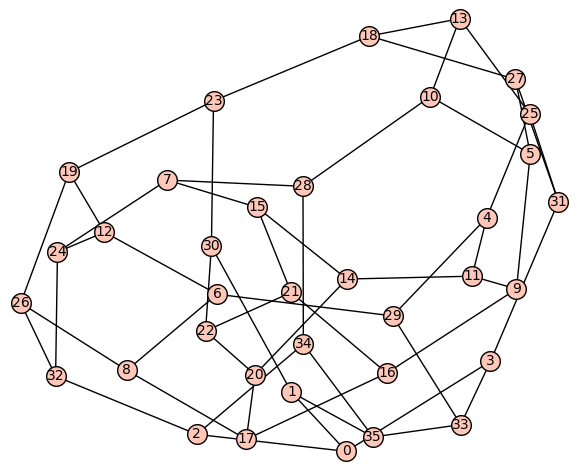

In [11]:
snark_3363.plot()

In [37]:
analiza_vozlišča(snark_3363,4, 11)

{'sosedi_a': [25, 11, 29],
 'sosedi_b': [4, 9, 14],
 'skupni_sosedi': set(),
 'najkrajsi_cikel': [18, 27, 31, 25, 13],
 'najdalsi_cikel': [5, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10],
 'vsi_cikli': [[5, 27, 31, 25, 13, 10],
  [18, 27, 31, 25, 13],
  [33, 3, 31, 25, 13, 10, 28, 34, 35],
  [1, 0, 3, 31, 25, 13, 10, 28, 34, 35],
  [2, 0, 3, 31, 25, 13, 10, 28, 34],
  [33, 29, 4, 25, 13, 10, 28, 34, 35],
  [7, 24, 12, 6, 29, 4, 25, 13, 10, 28],
  [2, 32, 24, 12, 6, 29, 4, 25, 13, 10, 28, 34],
  [8, 26, 32, 24, 12, 6],
  [19, 26, 32, 24, 12],
  [18, 23, 19, 12, 6, 29, 4, 25, 13],
  [1, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10, 28, 34, 35],
  [8, 17, 16, 21, 22, 30, 23, 19, 12, 6],
  [20, 17, 16, 21, 22],
  [5, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10],
  [11, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4],
  [7, 15, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10, 28],
  [11, 14, 15, 21, 22, 30, 23, 19, 12, 6, 29, 4],
  [20, 14, 15, 21, 22]],
 'cikli_z_a': [[33, 29, 4, 25, 13, 10,

In [38]:
analiza_vozlišča(snark_3363,16, 21)

{'sosedi_a': [17, 21, 9],
 'sosedi_b': [16, 22, 15],
 'skupni_sosedi': set(),
 'najkrajsi_cikel': [18, 27, 31, 25, 13],
 'najdalsi_cikel': [5, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10],
 'vsi_cikli': [[5, 27, 31, 25, 13, 10],
  [18, 27, 31, 25, 13],
  [33, 3, 31, 25, 13, 10, 28, 34, 35],
  [1, 0, 3, 31, 25, 13, 10, 28, 34, 35],
  [2, 0, 3, 31, 25, 13, 10, 28, 34],
  [33, 29, 4, 25, 13, 10, 28, 34, 35],
  [7, 24, 12, 6, 29, 4, 25, 13, 10, 28],
  [2, 32, 24, 12, 6, 29, 4, 25, 13, 10, 28, 34],
  [8, 26, 32, 24, 12, 6],
  [19, 26, 32, 24, 12],
  [18, 23, 19, 12, 6, 29, 4, 25, 13],
  [1, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10, 28, 34, 35],
  [8, 17, 16, 21, 22, 30, 23, 19, 12, 6],
  [20, 17, 16, 21, 22],
  [5, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10],
  [11, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4],
  [7, 15, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10, 28],
  [11, 14, 15, 21, 22, 30, 23, 19, 12, 6, 29, 4],
  [20, 14, 15, 21, 22]],
 'cikli_z_a': [[8, 17, 16, 21, 22, 30

In [39]:
analiza_vozlišča(snark_3363,22, 21)

{'sosedi_a': [20, 21, 30],
 'sosedi_b': [16, 22, 15],
 'skupni_sosedi': set(),
 'najkrajsi_cikel': [18, 27, 31, 25, 13],
 'najdalsi_cikel': [5, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10],
 'vsi_cikli': [[5, 27, 31, 25, 13, 10],
  [18, 27, 31, 25, 13],
  [33, 3, 31, 25, 13, 10, 28, 34, 35],
  [1, 0, 3, 31, 25, 13, 10, 28, 34, 35],
  [2, 0, 3, 31, 25, 13, 10, 28, 34],
  [33, 29, 4, 25, 13, 10, 28, 34, 35],
  [7, 24, 12, 6, 29, 4, 25, 13, 10, 28],
  [2, 32, 24, 12, 6, 29, 4, 25, 13, 10, 28, 34],
  [8, 26, 32, 24, 12, 6],
  [19, 26, 32, 24, 12],
  [18, 23, 19, 12, 6, 29, 4, 25, 13],
  [1, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10, 28, 34, 35],
  [8, 17, 16, 21, 22, 30, 23, 19, 12, 6],
  [20, 17, 16, 21, 22],
  [5, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10],
  [11, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4],
  [7, 15, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10, 28],
  [11, 14, 15, 21, 22, 30, 23, 19, 12, 6, 29, 4],
  [20, 14, 15, 21, 22]],
 'cikli_z_a': [[8, 17, 16, 21, 22, 3

In [61]:
analiza_vozlišča(graf_25159, 24, 33)

{'sosedi_a': [32, 33, 21],
 'sosedi_b': [36, 24, 30],
 'skupni_sosedi': set(),
 'cikli_z_a': [[24,
   21,
   15,
   8,
   5,
   10,
   13,
   19,
   23,
   26,
   29,
   35,
   39,
   42,
   41,
   36,
   31,
   32],
  [24, 33, 36, 31, 32]],
 'cikli_z_b': [[24, 33, 36, 31, 32], [30, 33, 36, 31, 32, 37]],
 'girth': 5,
 'skupni_cikli': {(24, 33, 36, 31, 32)},
 'kromatični_indeks': (4, (24, 33), Graph on 46 vertices)}

In [63]:
analiza_vozlišča(graf_25159, 0, 1)

{'sosedi_a': [1, 2, 3],
 'sosedi_b': [0, 42, 43],
 'skupni_sosedi': set(),
 'cikli_z_a': [[1, 0, 3, 41, 36, 31, 32, 37, 40, 43],
  [2, 0, 3, 41, 36, 31, 32, 37, 40]],
 'cikli_z_b': [[1, 42, 41, 36, 31, 32, 37, 40, 43],
  [1, 0, 3, 41, 36, 31, 32, 37, 40, 43]],
 'girth': 5,
 'skupni_cikli': {(1, 0, 3, 41, 36, 31, 32, 37, 40, 43)},
 'kromatični_indeks': (4, (0, 1), Graph on 46 vertices)}

In [8]:
def algoritem_2_izbrana(snark, izbrana_povezava):
    """
    Transformira graf z določenim pravilom: odstrani dve vozlišči, doda štiri nova in jih poveže v 4-cikel.
    
    :param snark: Graf, ki predstavlja vhodni graf.
    :param izbrana_povezava: Povezava (a, b), na kateri želimo izvesti transformacijo.
    :return: kromatični indeks, izbrana povezava, končni graf.
    """
    snark = snark.copy()  # Kopiraj graf za varno spremembo
    n = snark.order()  # Število vozlišč v grafu

    # Preveri, ali izbrana povezava obstaja
    if izbrana_povezava not in snark.edges(labels=False):
        raise ValueError(f"Povezava {izbrana_povezava} ne obstaja v grafu.")

    # Določi vozlišča izbrane povezave
    a, b = izbrana_povezava

    # Pridobi sosede vozlišč a in b (brez medsebojnih povezav)
    sosedi_a = [v for v in snark.neighbors(a) if v != b]
    sosedi_b = [v for v in snark.neighbors(b) if v != a]

    # Preveri, ali imata vozlišči natančno dva soseda
    if len(sosedi_a) != 2 or len(sosedi_b) != 2:
        raise ValueError("Vozlišči a in b nimata točno dveh drugih sosedov.")

    # Dodeli soseda vozliščema a in b
    a1, a2 = sosedi_a
    b1, b2 = sosedi_b

    # Odstranimo vozlišča a in b iz grafa
    snark.delete_vertices([a, b])

    # Dodamo štiri nova vozlišča
    nova_vozlisca = [n, n + 1, n + 2, n + 3]
    snark.add_vertices(nova_vozlisca)

    # Povežemo nova vozlišča z ustreznimi obstoječimi vozlišči
    snark.add_edge(a1, n)
    snark.add_edge(a2, n + 1)
    snark.add_edge(b1, n + 2)
    snark.add_edge(b2, n + 3)

    # Povezave v naključnem 4-ciklu
    shuffle(nova_vozlisca)
    snark.add_edges([(nova_vozlisca[i], nova_vozlisca[(i + 1) % 4]) for i in range(4)])

    # Preverimo kromatični indeks spremenjenega grafa
    krom_indeks = snark.chromatic_index()

    # Shranimo končni graf kot snark_1
    snark_1 = snark

    # Vrni kromatični indeks, izbrano povezavo in spremenjen graf
    return krom_indeks, izbrana_povezava, snark_1


In [14]:
algoritem_2_izbrana(goldberg_snark_3, (3,23))

(4, (3, 23), Graph on 26 vertices)

In [12]:
def analyze_graph_properties(graph):
    """
    This function outputs various properties of a graph in SageMath.
    :param graph: SageMath graph object
    :return: Dictionary with graph properties
    """
    properties = {}
    
    # Basic Properties
    properties['Number of vertices'] = graph.order()  # Changed to order()
    properties['Number of edges'] = graph.size()      # Changed to size()
    properties['Degree sequence'] = graph.degree_sequence()
    properties['Is connected?'] = graph.is_connected()
    properties['Is bipartite?'] = graph.is_bipartite()
    
    # Cycles and Girth
    try:
        properties['Girth'] = graph.girth()  # Length of the shortest cycle (if exists)
    except:
        properties['Girth'] = 'No cycle (infinite girth)'
    
    # Chromatic index (edge coloring)
    properties['Chromatic index'] = graph.chromatic_index()
    
    # Diameter and Radius
    try:
        properties['Diameter'] = graph.diameter()
        properties['Radius'] = graph.radius()
    except:
        properties['Diameter'] = 'Not applicable'
        properties['Radius'] = 'Not applicable'
    
    # Graph's cycles (this gets the cycle basis)
    properties['Cycle Basis'] = graph.cycle_basis()
    
    # Smallest cycle (if any)
    try:
        properties['Smallest cycle length'] = min(len(cycle) for cycle in graph.cycle_basis())
    except:
        properties['Smallest cycle length'] = 'No cycles'
    
    # Clique number
    properties['Clique number'] = graph.clique_number()
    
    # Average degree
    properties['Average degree'] = graph.average_degree()

    return properties


In [16]:
analyze_graph_properties(goldberg_snark_3)

{'Number of vertices': 24,
 'Number of edges': 36,
 'Degree sequence': [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 'Is connected?': True,
 'Is bipartite?': False,
 'Girth': 3,
 'Chromatic index': 4,
 'Diameter': 4,
 'Radius': 4,
 'Cycle Basis': [[3, 22, 23],
  [16, 11, 13, 18, 19, 14, 10, 17, 22, 23],
  [6, 7, 11, 13, 18, 19, 14, 10],
  [2, 21, 12, 7, 11, 13, 18, 19],
  [1, 20, 21, 12, 7, 11, 13, 18],
  [6, 15, 20, 21, 12, 7],
  [9, 15, 20, 21, 12, 7, 11, 13, 18, 19, 14, 10, 17],
  [4, 8, 12, 7, 11, 13],
  [16, 8, 12, 7, 11],
  [5, 4, 13, 18, 19, 14],
  [2, 0, 1, 18, 19],
  [3, 0, 1, 18, 19, 14, 10, 17, 22],
  [9, 5, 14, 10, 17]],
 'Smallest cycle length': 3,
 'Clique number': 3,
 'Average degree': 3}

In [19]:
krom_indeks, izbrana_povezava, snark_1 = algoritem_2_izbrana(goldberg_snark_3, (3,23))

analyze_graph_properties(snark_1)

{'Number of vertices': 26,
 'Number of edges': 39,
 'Degree sequence': [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 'Is connected?': True,
 'Is bipartite?': False,
 'Girth': 3,
 'Chromatic index': 4,
 'Diameter': 5,
 'Radius': 4,
 'Cycle Basis': [[22, 17, 10, 14, 19, 18, 13, 11, 16, 26, 27],
  [5, 9, 17, 10, 14],
  [6, 15, 9, 17, 10],
  [1, 20, 15, 9, 17, 10, 14, 19, 18],
  [2, 21, 20, 15, 9, 17, 10, 14, 19],
  [7, 12, 21, 20, 15, 9, 17, 10, 14, 19, 18, 13, 11],
  [8, 12, 21, 20, 15, 9, 17, 10, 14, 19, 18, 13, 11, 16],
  [7, 6, 10, 14, 19, 18, 13, 11],
  [4, 5, 14, 19, 18, 13],
  [1, 0, 2, 19, 18],
  [24, 0, 2, 19, 18, 13, 11, 16, 26],
  [8, 4, 13, 11, 16],
  [25, 24, 26, 27],
  [25, 22, 27]],
 'Smallest cycle length': 3,
 'Clique number': 3,
 'Average degree': 3}

In [21]:
krom_indeks, izbrana_povezava, snark_1 = algoritem_2_izbrana(goldberg_snark_3, (2,19))

analyze_graph_properties(snark_1)

{'Number of vertices': 26,
 'Number of edges': 39,
 'Degree sequence': [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 'Is connected?': True,
 'Is bipartite?': False,
 'Girth': 3,
 'Chromatic index': 3,
 'Diameter': 5,
 'Radius': 4,
 'Cycle Basis': [[3, 22, 23],
  [14, 10, 17, 22, 23, 16, 11, 13, 18, 26, 27],
  [7, 6, 10, 17, 22, 23, 16, 11],
  [9, 15, 6, 10, 17],
  [1, 20, 15, 6, 10, 17, 22, 23, 16, 11, 13, 18],
  [25, 21, 20, 15, 6, 10, 17, 22, 23, 16, 11, 13, 18, 26, 27],
  [7, 12, 21, 20, 15, 6],
  [8, 12, 21, 20, 15, 6, 10, 17, 22, 23, 16],
  [4, 5, 9, 17, 22, 23, 16, 11, 13],
  [14, 5, 9, 17, 22, 23, 16, 11, 13, 18, 26, 27],
  [1, 0, 3, 23, 16, 11, 13, 18],
  [24, 0, 3, 23, 16, 11, 13, 18, 26],
  [4, 8, 16, 11, 13],
  [25, 24, 26, 27]],
 'Smallest cycle length': 3,
 'Clique number': 3,
 'Average degree': 3}

In [22]:
krom_indeks, izbrana_povezava, snark_1 = algoritem_2_izbrana(goldberg_snark_3, (22,23))

analyze_graph_properties(snark_1)

{'Number of vertices': 26,
 'Number of edges': 39,
 'Degree sequence': [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 'Is connected?': True,
 'Is bipartite?': False,
 'Girth': 4,
 'Chromatic index': 4,
 'Diameter': 5,
 'Radius': 4,
 'Cycle Basis': [[24, 17, 10, 14, 19, 18, 13, 11, 16, 26, 27],
  [5, 9, 17, 10, 14],
  [6, 15, 9, 17, 10],
  [1, 20, 15, 9, 17, 10, 14, 19, 18],
  [2, 21, 20, 15, 9, 17, 10, 14, 19],
  [7, 12, 21, 20, 15, 9, 17, 10, 14, 19, 18, 13, 11],
  [8, 12, 21, 20, 15, 9, 17, 10, 14, 19, 18, 13, 11, 16],
  [7, 6, 10, 14, 19, 18, 13, 11],
  [4, 5, 14, 19, 18, 13],
  [1, 0, 2, 19, 18],
  [3, 0, 2, 19, 18, 13, 11, 16, 26, 27],
  [8, 4, 13, 11, 16],
  [24, 25, 26, 27],
  [3, 25, 26, 27]],
 'Smallest cycle length': 4,
 'Clique number': 2,
 'Average degree': 3}

In [23]:
analyze_graph_properties(snark_3363)

{'Number of vertices': 36,
 'Number of edges': 54,
 'Degree sequence': [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 'Is connected?': True,
 'Is bipartite?': False,
 'Girth': 5,
 'Chromatic index': 4,
 'Diameter': 6,
 'Radius': 5,
 'Cycle Basis': [[5, 27, 31, 25, 13, 10],
  [18, 27, 31, 25, 13],
  [33, 3, 31, 25, 13, 10, 28, 34, 35],
  [1, 0, 3, 31, 25, 13, 10, 28, 34, 35],
  [2, 0, 3, 31, 25, 13, 10, 28, 34],
  [33, 29, 4, 25, 13, 10, 28, 34, 35],
  [7, 24, 12, 6, 29, 4, 25, 13, 10, 28],
  [2, 32, 24, 12, 6, 29, 4, 25, 13, 10, 28, 34],
  [8, 26, 32, 24, 12, 6],
  [19, 26, 32, 24, 12],
  [18, 23, 19, 12, 6, 29, 4, 25, 13],
  [1, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10, 28, 34, 35],
  [8, 17, 16, 21, 22, 30, 23, 19, 12, 6],
  [20, 17, 16, 21, 22],
  [5, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4, 25, 13, 10],
  [11, 9, 16, 21, 22, 30, 23, 19, 12, 6, 29, 4],
  

In [27]:
krom_indeks, izbrana_povezava, snark_1 = algoritem_2_izbrana(snark_3363, (4,11))

analyze_graph_properties(snark_1)

{'Number of vertices': 38,
 'Number of edges': 57,
 'Degree sequence': [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 'Is connected?': True,
 'Is bipartite?': False,
 'Girth': 4,
 'Chromatic index': 4,
 'Diameter': 6,
 'Radius': 5,
 'Cycle Basis': [[12, 24, 32, 26, 19],
  [15, 7, 24, 32, 26, 19, 23, 30, 22, 21],
  [2, 34, 28, 7, 24, 32],
  [1, 35, 34, 28, 7, 24, 32, 26, 19, 23, 30],
  [37, 29, 33, 35, 34, 28, 7, 24, 32, 26, 19, 23, 30, 22, 21, 16, 9, 38, 39],
  [8, 6, 29, 33, 35, 34, 28, 7, 24, 32, 26],
  [12, 6, 29, 33, 35, 34, 28, 7, 24],
  [5, 27, 31, 3, 33, 35, 34, 28, 7, 24, 32, 26, 19, 23, 30, 22, 21, 16, 9],
  [18, 27, 31, 3, 33, 35, 34, 28, 7, 24, 32, 26, 19, 23],
  [36,
   25,
   31,
   3,
   33,
   35,
   34,
   28,
   7,
   24,
   32,
   26,
   19,
   23,
   30,
   22,
   21,
   16,
   9,
   38],
  [10, 13, 25, 31, 3, 33, 35, 34, 28]

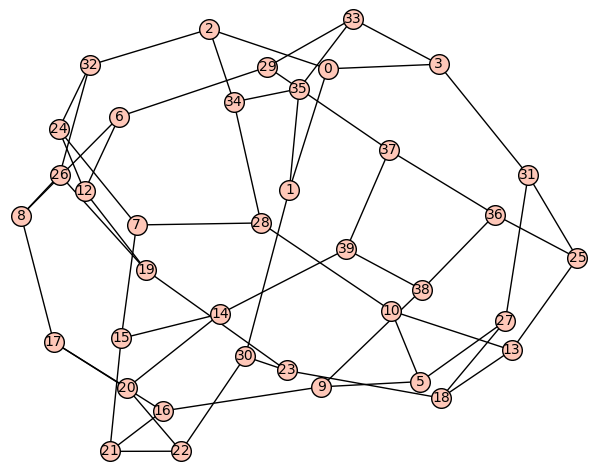

In [28]:
snark_1.plot()

In [26]:
krom_indeks, izbrana_povezava, snark_1 = algoritem_2_izbrana(snark_3363, (16,21))

analyze_graph_properties(snark_1)

{'Number of vertices': 38,
 'Number of edges': 57,
 'Degree sequence': [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 'Is connected?': True,
 'Is bipartite?': False,
 'Girth': 4,
 'Chromatic index': 3,
 'Diameter': 6,
 'Radius': 5,
 'Cycle Basis': [[12, 24, 32, 26, 19],
  [15, 7, 24, 32, 26, 19, 23, 30, 22, 38, 39],
  [2, 34, 28, 7, 24, 32],
  [1, 35, 34, 28, 7, 24, 32, 26, 19, 23, 30],
  [8, 6, 29, 33, 35, 34, 28, 7, 24, 32, 26],
  [12, 6, 29, 33, 35, 34, 28, 7, 24],
  [20, 14, 11, 4, 29, 33, 35, 34, 28, 7, 24, 32, 26, 19, 23, 30, 22],
  [15, 14, 11, 4, 29, 33, 35, 34, 28, 7],
  [37, 9, 11, 4, 29, 33, 35, 34, 28, 7, 24, 32, 26, 19, 23, 30, 22, 38],
  [10, 5, 9, 11, 4, 29, 33, 35, 34, 28],
  [18, 27, 5, 9, 11, 4, 29, 33, 35, 34, 28, 7, 24, 32, 26, 19, 23],
  [3, 31, 27, 5, 9, 11, 4, 29, 33],
  [25, 31, 27, 5, 9, 11, 4],
  [10, 13, 25, 4, 29, 33

In [42]:
analyze_graph_properties(graf_25159)

{'Number of vertices': 44,
 'Number of edges': 66,
 'Degree sequence': [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 'Is connected?': True,
 'Is bipartite?': False,
 'Girth': 5,
 'Chromatic index': 4,
 'Diameter': 8,
 'Radius': 7,
 'Cycle Basis': [[1, 42, 41, 36, 31, 32, 37, 40, 43],
  [2, 39, 42, 41, 36, 31, 32, 37, 40],
  [38, 34, 26, 29, 35, 39, 42, 41, 36, 31, 32, 37, 40, 43],
  [22, 28, 34, 26, 29],
  [27, 28, 34, 26, 29, 35],
  [27, 23, 26, 29, 35],
  [22, 18, 10, 13, 19, 23, 26, 29],
  [4, 12, 18, 10, 13],
  [11, 12, 18, 10, 13, 19],
  [11, 5, 10, 13, 19],
  [24, 21, 15, 8, 5, 10, 13, 19, 23, 26, 29, 35, 39, 42, 41, 36, 31, 32],
  [4, 9, 16, 21, 15, 8, 5, 10, 13],
  [7, 17, 9, 16, 21, 15],
  [14, 20, 17, 9, 16, 21, 15, 8],
  [25,
   20,
   17,
   9,
   16,
   21,
   15,
   8,
   5,
   10,
   13,
   19,
   2

In [30]:
krom_indeks, izbrana_povezava, snark_1 = algoritem_2_izbrana(graf_25159, (30,25))

analyze_graph_properties(snark_1)

{'Number of vertices': 46,
 'Number of edges': 69,
 'Degree sequence': [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 'Is connected?': True,
 'Is bipartite?': False,
 'Girth': 4,
 'Chromatic index': 4,
 'Diameter': 8,
 'Radius': 7,
 'Cycle Basis': [[44, 33, 24, 21, 16, 9, 17, 20, 46, 47],
  [31, 36, 33, 24, 21, 16, 9, 17, 20, 46, 47],
  [3, 38, 34, 26, 29, 35, 39, 42, 41],
  [1, 43, 38, 34, 26, 29, 35, 39, 42],
  [2, 40, 43, 38, 34, 26, 29, 35, 39],
  [45,
   37,
   40,
   43,
   38,
   34,
   26,
   29,
   35,
   39,
   42,
   41,
   36,
   33,
   24,
   21,
   16,
   9,
   17,
   20,
   46],
  [32, 37, 40, 43, 38, 34, 26, 29, 35, 39, 42, 41, 36, 33, 24],
  [22, 28, 34, 26, 29],
  [27, 28, 34, 26, 29, 35],
  [27, 23, 26, 29, 35],
  [4, 13, 19, 23, 26, 29, 35, 39, 42, 41, 36, 33, 24, 21, 16, 9],
  [22, 18

In [0]:
Poglejmo si snark_3363 in poglejmo, kdaj se ohrani in če se sploh ohrani v drugem koraku, v primeru, da se v prvem koraku ohrani:

In [13]:
krom_indeks, izbrana_povezava, snark_1 = algoritem_2_izbrana(snark_3363, (4,11))

snark_1.relabel()
ponavljaj_algoritem_2_samo_4(snark_1,500)

[(4, (0, 36)), (4, (1, 36)), (4, (0, 37)), (4, (1, 37)), (4, (10, 36))]

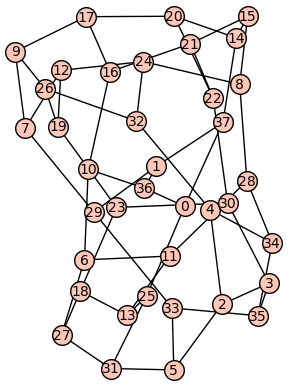

In [14]:
snark_1.show()

Opazimo, da se je ohranil index v drugem koraku, ko smo izbrali povezavo iz 4 cikla, zraven pa je še povezava \(10,36\), ki pa ni del cikla. Poskusimo še v tretjem koraku:



In [16]:
krom_indeks, izbrana_povezava, snark_2 = algoritem_2_izbrana(snark_1, (0,36))

snark_2.relabel()
ponavljaj_algoritem_2_samo_4(snark_2, 500)


[(4, (2, 38)),
 (4, (0, 37)),
 (4, (1, 39)),
 (4, (0, 1)),
 (4, (11, 39)),
 (4, (38, 39)),
 (4, (0, 38)),
 (4, (2, 37))]

In [17]:
krom_indeks, izbrana_povezava, snark_2 = algoritem_2_izbrana(snark_1, (10,36))

snark_2.relabel()
ponavljaj_algoritem_2_samo_4(snark_2, 500)


[(4, (1, 38)),
 (4, (2, 38)),
 (4, (0, 39)),
 (4, (0, 1)),
 (4, (3, 37)),
 (4, (38, 39)),
 (4, (3, 39)),
 (4, (2, 37))]

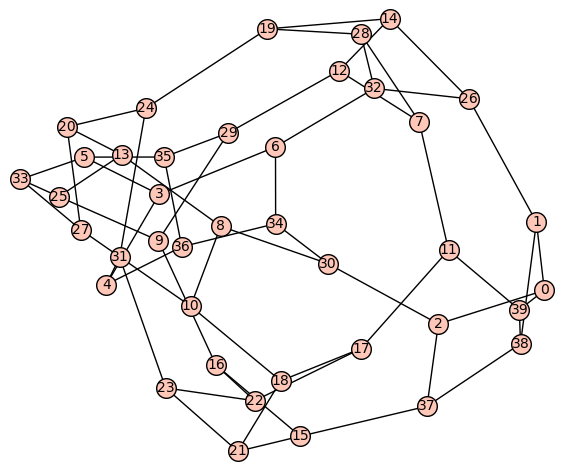

In [72]:
snark_2.plot()

In [18]:
krom_indeks, izbrana_povezava, snark_3 = algoritem_2_izbrana(snark_2, (2,37))

snark_3.relabel()
ponavljaj_algoritem_2_samo_4(snark_3, 500)


[(4, (0, 40)),
 (4, (2, 39)),
 (4, (2, 3)),
 (4, (3, 38)),
 (4, (4, 40)),
 (4, (40, 41)),
 (4, (4, 39)),
 (4, (0, 1)),
 (4, (38, 39)),
 (4, (1, 41)),
 (4, (0, 38))]

Znova se indeks ohrani, v kolikor izberemo 4\-cikel, zraven pa imamo še nekaj povezav. Vidimo torej, da se zagotovo ohrani, če izberemo povezavo iz 4 cikla. Poglejmo, če se lahko indeks vrne, če izberemo povezavo, ki da kromatični indeks 3.



In [73]:
krom_indeks, izbrana_povezava, snark_2 = algoritem_2_izbrana(snark_1, (7,9))

snark_2.relabel()
ponavljaj_algoritem_2_samo_4(snark_2, 300)


[]

Vidimo, da se indeks ne more vrnit na 4. Kaj pa če poskusimo iteracijo?


In [76]:
iteriraj_algoritem_2(snark_2,100)

[(-1, 'None', 3),
 (0, (13, 25), 3),
 (1, (21, 22), 3),
 (2, (9, 15), 3),
 (3, (19, 23), 3),
 (4, (40, 42), 3),
 (5, (2, 36), 3),
 (6, (12, 24), 3),
 (7, (53, 54), 3),
 (8, (16, 17), 3),
 (9, (18, 70), 3),
 (10, (61, 62), 3),
 (11, (68, 69), 3),
 (12, (30, 55), 3),
 (13, (48, 51), 3),
 (14, (56, 59), 3),
 (15, (41, 98), 3),
 (16, (0, 1), 3),
 (17, (76, 79), 3),
 (18, (34, 35), 3),
 (19, (97, 108), 3),
 (20, (52, 91), 3),
 (21, (63, 83), 3),
 (22, (94, 95), 3),
 (23, (112, 115), 3),
 (24, (84, 85), 3),
 (25, (47, 89), 3),
 (26, (93, 131), 3),
 (27, (26, 32), 3),
 (28, (4, 5), 3),
 (29, (73, 74), 3),
 (30, (14, 130), 3),
 (31, (8, 10), 3),
 (32, (31, 43), 3),
 (33, (135, 155), 3),
 (34, (39, 149), 3),
 (35, (150, 178), 3),
 (36, (117, 118), 3),
 (37, (57, 171), 3),
 (38, (64, 67), 3),
 (39, (45, 50), 3),
 (40, (7, 168), 3),
 (41, (164, 165), 3),
 (42, (3, 37), 3),
 (43, (88, 90), 3),
 (44, (66, 195), 3),
 (45, (120, 122), 3),
 (46, (180, 183), 3),
 (47, (86, 138), 3),
 (48, (109, 186), 3

Vidimo, da se indeks nikoli ne vrne na 4, torej lahko zavržema hipotezo.



Zdaj pa iteracijska koda:



In [20]:
import random

def iteriraj_algoritem_2(snark, k):
    snark = snark.copy()
    """
    Izvede algoritem za transformacijo grafa z dodajanjem 4-ciklov k-krat.
    
    :param snark: Graf, ki predstavlja snark.
    :param k: Število iteracij algoritma.
    :return: Tabela s seznamom iteracij, odstranjenih vozlišč in kromatičnim indeksom.
    """
    odstranjena_vozlisca = ["None"]  # Seznam za shranjevanje odstranjenih vozlišč
    kromaticni_indeksi = [snark.chromatic_index()]
    n = snark.order()  # Trenutno število vozlišč

    for _ in range(k):
        # Kopiraj seznam povezav
        povezave = snark.edges(labels=False)

        # Izberi naključno povezavo
        a, b = random.choice(povezave)

        # Pridobi sosede a in b (brez medsebojnih povezav)
        sosedi_a = [v for v in snark.neighbors(a) if v != b]
        sosedi_b = [v for v in snark.neighbors(b) if v != a]

        if len(sosedi_a) != 2 or len(sosedi_b) != 2:
            raise ValueError(f"Vozlišči {a} in {b} nimata točno dveh drugih sosedov.")

        a1, a2 = sosedi_a
        b1, b2 = sosedi_b

        # Odstrani povezavo (a, b) in vozlišča a, b
        snark.delete_edge((a, b))
        snark.delete_vertices([a, b])

        # Dodaj štiri nova vozlišča
        nova_vozlisca = [n, n+1, n+2, n+3]
        snark.add_vertices(nova_vozlisca)

        # Poveži nova vozlišča z obstoječimi
        snark.add_edge(a1, n)
        snark.add_edge(a2, n+1)
        snark.add_edge(b1, n+2)
        snark.add_edge(b2, n+3)

        # Naključni 4-cikel
        random.shuffle(nova_vozlisca)
        snark.add_edges([(nova_vozlisca[i], nova_vozlisca[(i + 1) % 4]) for i in range(4)])

        # Dodaj odstranjena vozlišča in kromatični indeks v sezname
        odstranjena_vozlisca.append((a, b))
        kromaticni_indeksi.append(snark.chromatic_index())

        # Posodobi indeks za nova vozlišča
        n += 4

        # Preveri kubičnost
        for v in snark.vertices():
            if snark.degree(v) != 3:
                raise ValueError(f"Vozlišče {v} nima stopnje 3. Graf ni več kubičen.")

        # Pripravi podatke za tabelo
        tabela = [(-1 + i, odstranjena_vozlisca[i], kromaticni_indeksi[i]) for i in range(len(odstranjena_vozlisca))]
    
    return tabela

Poglejmo si najprej iteracijo na snarku, kjer se v prvem koraku indeks zagotovo spremeni na 3. Ali se lahko vrne na 4?


In [44]:
iteriraj_algoritem_2(flower_snark_j5,91)

[(-1, 'None', 4),
 (0, (1, 15), 3),
 (1, (13, 17), 3),
 (2, (3, 18), 3),
 (3, (12, 31), 3),
 (4, (2, 26), 3),
 (5, (32, 33), 3),
 (6, (38, 39), 3),
 (7, (6, 9), 3),
 (8, (5, 11), 3),
 (9, (30, 55), 3),
 (10, (0, 28), 3),
 (11, (20, 60), 3),
 (12, (44, 47), 3),
 (13, (35, 41), 3),
 (14, (62, 63), 3),
 (15, (34, 42), 3),
 (16, (76, 77), 3),
 (17, (10, 19), 3),
 (18, (68, 70), 3),
 (19, (64, 66), 3),
 (20, (23, 25), 3),
 (21, (8, 16), 3),
 (22, (29, 107), 3),
 (23, (69, 95), 3),
 (24, (84, 86), 3),
 (25, (81, 83), 3),
 (26, (101, 102), 3),
 (27, (105, 110), 3),
 (28, (48, 50), 3),
 (29, (73, 109), 3),
 (30, (133, 134), 3),
 (31, (129, 130), 3),
 (32, (138, 139), 3),
 (33, (145, 146), 3),
 (34, (90, 91), 3),
 (35, (27, 71), 3),
 (36, (72, 74), 3),
 (37, (117, 118), 3),
 (38, (53, 89), 3),
 (39, (160, 161), 3),
 (40, (147, 148), 3),
 (41, (75, 165), 3),
 (42, (4, 142), 3),
 (43, (14, 21), 3),
 (44, (37, 158), 3),
 (45, (40, 156), 3),
 (46, (188, 190), 3),
 (47, (164, 186), 3),
 (48, (173, 1

vidimo, da se indeks ni nikoli vrnil na začetno vrednost.Poskusimo zdaj iteracijo še na grafu, kjer se v prvem koraku indeks zagotovo ohrani.


In [21]:
iteriraj_algoritem_2(graf_25159,100)

[(-1, 'None', 4),
 (0, (10, 18), 4),
 (1, (22, 46), 4),
 (2, (0, 3), 4),
 (3, (4, 13), 4),
 (4, (26, 29), 4),
 (5, (44, 47), 4),
 (6, (21, 24), 3),
 (7, (28, 48), 3),
 (8, (51, 64), 3),
 (9, (31, 36), 3),
 (10, (72, 74), 3),
 (11, (65, 66), 3),
 (12, (8, 14), 3),
 (13, (45, 90), 3),
 (14, (68, 69), 3),
 (15, (94, 95), 3),
 (16, (34, 38), 3),
 (17, (5, 88), 3),
 (18, (92, 93), 3),
 (19, (56, 57), 3),
 (20, (75, 77), 3),
 (21, (2, 39), 3),
 (22, (70, 71), 3),
 (23, (101, 135), 3),
 (24, (106, 107), 3),
 (25, (33, 82), 3),
 (26, (110, 111), 3),
 (27, (132, 133), 3),
 (28, (140, 141), 3),
 (29, (116, 119), 3),
 (30, (114, 115), 3),
 (31, (136, 137), 3),
 (32, (168, 169), 3),
 (33, (160, 163), 3),
 (34, (52, 54), 3),
 (35, (150, 151), 3),
 (36, (15, 103), 3),
 (37, (27, 35), 3),
 (38, (157, 159), 3),
 (39, (179, 188), 3),
 (40, (62, 63), 3),
 (41, (117, 143), 3),
 (42, (105, 142), 3),
 (43, (205, 207), 3),
 (44, (212, 215), 3),
 (45, (197, 199), 3),
 (46, (173, 174), 3),
 (47, (85, 86), 3),

Opazimo, da se je indeks v prvih nekaj korakih ohranil, nato je pa padel na 3 in tam tudi ostal. Čeprav smo v teoriji pokazali, da bi naj obstajala možnost, da se indeks vrne nazaj na 4. Torej je naša hipoteza, da se indeks nikoli več ne vrne na 4. Poskusimo še na kakšnem grafu, da to hipotezo potrdimo.


In [22]:
iteriraj_algoritem_2(snark_3363,100)

[(-1, 'None', 4),
 (0, (8, 26), 3),
 (1, (7, 24), 3),
 (2, (13, 18), 3),
 (3, (25, 31), 3),
 (4, (16, 17), 3),
 (5, (49, 51), 3),
 (6, (44, 47), 3),
 (7, (0, 3), 3),
 (8, (40, 42), 3),
 (9, (36, 38), 3),
 (10, (23, 46), 3),
 (11, (5, 9), 3),
 (12, (50, 67), 3),
 (13, (30, 77), 3),
 (14, (56, 58), 3),
 (15, (1, 88), 3),
 (16, (4, 29), 3),
 (17, (15, 41), 3),
 (18, (73, 74), 3),
 (19, (82, 83), 3),
 (20, (84, 86), 3),
 (21, (90, 98), 3),
 (22, (37, 75), 3),
 (23, (92, 94), 3),
 (24, (70, 71), 3),
 (25, (89, 99), 3),
 (26, (2, 34), 3),
 (27, (105, 107), 3),
 (28, (32, 110), 3),
 (29, (45, 78), 3),
 (30, (10, 28), 3),
 (31, (27, 59), 3),
 (32, (140, 149), 3),
 (33, (39, 72), 3),
 (34, (62, 63), 3),
 (35, (133, 135), 3),
 (36, (126, 170), 3),
 (37, (168, 182), 3),
 (38, (104, 106), 3),
 (39, (154, 155), 3),
 (40, (85, 87), 3),
 (41, (141, 164), 3),
 (42, (152, 153), 3),
 (43, (12, 19), 3),
 (44, (200, 203), 3),
 (45, (142, 165), 3),
 (46, (76, 211), 3),
 (47, (184, 210), 3),
 (48, (100, 103

In [0]:
Za na konec pa algoritem, ki naključno izbere algoritem_1 ali algoritem_2:

In [23]:
import random

def nakljucni_algoritem(snark, k):
    snark = snark.copy()
    tabela_rezultatov = []
    tabela_rezultatov.append([snark.chromatic_index(), "None", "None", "None"])
    n = snark.order()

    for _ in range(k):
        izbran_algoritem = random.choice(["algoritem_1", "algoritem_2"])
        
        if izbran_algoritem == "algoritem_1":
            prvi_rob = random.choice(snark.edges(labels=False))
            drugi_rob = random.choice([rob for rob in snark.edges(labels=False) if rob != prvi_rob])

            u1, u2 = n, n+1
            snark.add_edge(prvi_rob[0], n)
            snark.add_edge(n, n+1)
            snark.add_edge(n+1, prvi_rob[1])

            v1, v2 = n+2, n+3
            snark.add_edge(drugi_rob[0], n+2)
            snark.add_edge(n+2, n+3)
            snark.add_edge(n+3, drugi_rob[1])

            snark.add_edge(n, n+2)
            snark.add_edge(n+1, n+3)

            snark.delete_edge(prvi_rob)
            snark.delete_edge(drugi_rob)
            n += 4
            
            krom_indeks = snark.chromatic_index()
            tabela_rezultatov.append([krom_indeks, "Algoritem 1", prvi_rob, drugi_rob])
        
        else:
            povezave = snark.edges(labels=False)
            a, b = random.choice(povezave)
            sosedi_a = [v for v in snark.neighbors(a) if v != b]
            sosedi_b = [v for v in snark.neighbors(b) if v != a]
            
            if len(sosedi_a) != 2 or len(sosedi_b) != 2:
                continue
            
            a1, a2 = sosedi_a
            b1, b2 = sosedi_b

            snark.delete_edge((a, b))
            snark.delete_vertices([a, b])

            nova_vozlisca = [n, n+1, n+2, n+3]
            snark.add_vertices(nova_vozlisca)
            snark.add_edge(a1, n)
            snark.add_edge(a2, n+1)
            snark.add_edge(b1, n+2)
            snark.add_edge(b2, n+3)
            
            random.shuffle(nova_vozlisca)
            snark.add_edges([(nova_vozlisca[i], nova_vozlisca[(i + 1) % 4]) for i in range(4)])
            n += 4
            
            krom_indeks = snark.chromatic_index()
            tabela_rezultatov.append([krom_indeks, "Algoritem 2", (a, b), "None"])

    return tabela_rezultatov

In [24]:
nakljucni_algoritem(snark_3363,50)

[[4, 'None', 'None', 'None'],
 [3, 'Algoritem 1', (13, 18), (5, 9)],
 [3, 'Algoritem 1', (7, 15), (12, 19)],
 [3, 'Algoritem 2', (14, 15), 'None'],
 [3, 'Algoritem 2', (11, 45), 'None'],
 [3, 'Algoritem 1', (8, 26), (48, 50)],
 [3, 'Algoritem 1', (18, 23), (25, 31)],
 [3, 'Algoritem 2', (19, 23), 'None'],
 [3, 'Algoritem 2', (21, 22), 'None'],
 [3, 'Algoritem 2', (4, 29), 'None'],
 [3, 'Algoritem 2', (64, 65), 'None'],
 [3, 'Algoritem 1', (57, 62), (16, 72)],
 [3, 'Algoritem 1', (7, 24), (25, 58)],
 [3, 'Algoritem 1', (68, 70), (41, 47)],
 [3, 'Algoritem 1', (62, 77), (36, 38)],
 [3, 'Algoritem 1', (77, 79), (57, 76)],
 [3, 'Algoritem 1', (20, 44), (72, 74)],
 [3, 'Algoritem 1', (92, 93), (72, 75)],
 [3, 'Algoritem 1', (18, 27), (60, 62)],
 [3, 'Algoritem 2', (53, 55), 'None'],
 [3, 'Algoritem 1', (18, 104), (58, 59)],
 [3, 'Algoritem 2', (90, 91), 'None'],
 [3, 'Algoritem 1', (33, 70), (58, 83)],
 [3, 'Algoritem 1', (89, 119), (72, 79)],
 [3, 'Algoritem 1', (118, 119), (0, 2)],
 [3, '

In [25]:
nakljucni_algoritem(graf_25159,50)

[[4, 'None', 'None', 'None'],
 [4, 'Algoritem 2', (11, 12), 'None'],
 [4, 'Algoritem 2', (34, 38), 'None'],
 [4, 'Algoritem 2', (16, 21), 'None'],
 [4, 'Algoritem 2', (27, 35), 'None'],
 [4, 'Algoritem 1', (7, 15), (3, 50)],
 [3, 'Algoritem 1', (37, 40), (18, 22)],
 [3, 'Algoritem 1', (26, 29), (8, 14)],
 [3, 'Algoritem 1', (37, 64), (29, 69)],
 [3, 'Algoritem 1', (68, 69), (10, 18)],
 [3, 'Algoritem 1', (76, 77), (10, 78)],
 [3, 'Algoritem 2', (17, 20), 'None'],
 [3, 'Algoritem 1', (64, 65), (1, 43)],
 [3, 'Algoritem 2', (5, 45), 'None'],
 [3, 'Algoritem 2', (73, 75), 'None'],
 [3, 'Algoritem 1', (13, 19), (26, 48)],
 [3, 'Algoritem 2', (28, 49), 'None'],
 [3, 'Algoritem 1', (93, 95), (15, 55)],
 [3, 'Algoritem 2', (40, 43), 'None'],
 [3, 'Algoritem 2', (2, 113), 'None'],
 [3, 'Algoritem 1', (41, 42), (78, 83)],
 [3, 'Algoritem 2', (51, 114), 'None'],
 [3, 'Algoritem 2', (76, 80), 'None'],
 [3, 'Algoritem 2', (129, 131), 'None'],
 [3, 'Algoritem 2', (77, 81), 'None'],
 [3, 'Algoritem 

Za konec pa še algoritem, ki ti vrne povezave, na katerih lahko uporabiš 4\-cikel, brez da se indeks spremeni:



In [15]:
def algoritem_2_graf(snark, izbrana_povezava):
    """
    Transformira graf z določenim pravilom: odstrani dve vozlišči, doda štiri nova in jih poveže v 4-cikel.
    
    :param snark: Graf, ki predstavlja vhodni graf.
    :param izbrana_povezava: Povezava (a, b), na kateri želimo izvesti transformacijo.
    :return: kromatični indeks, izbrana povezava, končni graf.
    """
    snark = snark.copy()  # Kopiraj graf za varno spremembo
    n = snark.order()  # Število vozlišč v grafu

    # Preveri, ali izbrana povezava obstaja
    if izbrana_povezava not in snark.edges(labels=False):
        raise ValueError(f"Povezava {izbrana_povezava} ne obstaja v grafu.")

    # Določi vozlišča izbrane povezave
    a, b = izbrana_povezava

    # Pridobi sosede vozlišč a in b (brez medsebojnih povezav)
    sosedi_a = [v for v in snark.neighbors(a) if v != b]
    sosedi_b = [v for v in snark.neighbors(b) if v != a]

    # Preveri, ali imata vozlišči natančno dva soseda
    if len(sosedi_a) != 2 or len(sosedi_b) != 2:
        raise ValueError("Vozlišči a in b nimata točno dveh drugih sosedov.")

    # Dodeli soseda vozliščema a in b
    a1, a2 = sosedi_a
    b1, b2 = sosedi_b

    # Odstranimo vozlišča a in b iz grafa
    snark.delete_vertices([a, b])

    # Dodamo štiri nova vozlišča
    nova_vozlisca = [n, n + 1, n + 2, n + 3]
    snark.add_vertices(nova_vozlisca)

    # Povežemo nova vozlišča z ustreznimi obstoječimi vozlišči
    snark.add_edge(a1, n)
    snark.add_edge(a2, n + 1)
    snark.add_edge(b1, n + 2)
    snark.add_edge(b2, n + 3)

    # Povezave v naključnem 4-ciklu
    shuffle(nova_vozlisca)
    snark.add_edges([(nova_vozlisca[i], nova_vozlisca[(i + 1) % 4]) for i in range(4)])

    # Preverimo kromatični indeks spremenjenega grafa
    krom_indeks = snark.chromatic_index()

    # Shranimo končni graf kot snark_1
    snark_1 = snark

    # Vrni kromatični indeks, izbrano povezavo in spremenjen graf
    return snark_1

def find_stable_edges(G):
    critical_edges = set()
    
    for u, v, *_ in G.edges():  # Popravljeno!
        H = algoritem_2_graf(G, (u, v))
        if H is not None and H.chromatic_index() == G.chromatic_index():
            critical_edges.add((u, v))

    return critical_edges


In [16]:
find_stable_edges(snark_3363)

{(4, 11), (9, 11)}

In [17]:
find_stable_edges(G)

set()

In [18]:
find_stable_edges(goldberg_snark_3)

{(3, 22), (3, 23), (22, 23)}